In [20]:
!pip install mysql-connector-python pandas

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
# Define connection parameters
host = '18.136.157.135'
user = 'dm_team8'
password = 'DM!$!Team!82@04!23&'
database = 'project_job_market_analysis'


In [25]:
# Connect to the database
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)


In [26]:
# Create a cursor object
cursor = connection.cursor()

# Write the query to fetch data
query = "SELECT * FROM Market"  # Replace 'Market' with your actual table name

# Execute the query
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

# Get column names from cursor description
columns = [desc[0] for desc in cursor.description]


In [48]:
# Load results into a pandas DataFrame
df = pd.DataFrame(results, columns=columns)

In [28]:
# Close the cursor and connection
cursor.close()
connection.close()


In [78]:
## 1 # Export the DataFrame to a CSV file
df.to_csv('dataset.csv', index=False)
print("Data has been successfully exported to 'dataset.csv'")


Data has been successfully exported to 'dataset.csv'


In [30]:
df.head()

,ID,Job_Title,Salary_Estimate,FIELD4,Rating,Company_Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),None,3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),None,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),None,4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),None,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),None,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [32]:
# Check the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  742 non-null    int64 
 1   Job_Title           742 non-null    object
 2   Salary_Estimate     742 non-null    object
 3   FIELD4              0 non-null      object
 4   Rating              742 non-null    object
 5   Company_Name        742 non-null    object
 6   Location            742 non-null    object
 7   Headquarters        742 non-null    object
 8   Size                742 non-null    object
 9   Founded             742 non-null    int64 
 10  Type_of_ownership   742 non-null    object
 11  Industry            742 non-null    object
 12  Sector              742 non-null    object
 13  Revenue             742 non-null    object
 14  Competitors         742 non-null    object
 15  Hourly              742 non-null    int64 
 16  Employer_provided   742 no

In [33]:
# Summary statistics
df.describe()


,ID,Founded,Hourly,Employer_provided,Lower_Salary,Upper_Salary,Age,Python,spark,aws,...,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,...,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,1837.154987,0.032345,0.022911,74.754717,128.214286,47.524259,0.528302,0.225067,0.237197,...,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868
std,279.793117,497.183763,0.177034,0.149721,30.945892,45.128650,53.839080,0.499535,0.417908,0.425651,...,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150
min,0.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,221.500000,1939.000000,0.000000,0.000000,52.000000,96.000000,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,472.500000,1988.000000,0.000000,0.000000,69.500000,124.000000,25.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,707.750000,2007.000000,0.000000,0.000000,91.000000,155.000000,60.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,955.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,277.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
# Check for missing values
df.isnull().sum()

ID                      0
Job_Title               0
Salary_Estimate         0
FIELD4                742
Rating                  0
Company_Name            0
Location                0
Headquarters            0
Size                    0
Founded                 0
Type_of_ownership       0
Industry                0
Sector                  0
Revenue                 0
Competitors             0
Hourly                  0
Employer_provided       0
Lower_Salary            0
Upper_Salary            0
Avg_SalaryK             0
company_txt             0
Job_Location            0
Age                     0
Python                  0
spark                   0
aws                     0
excel                   0
sql_                    0
sas                     0
keras                   0
pytorch                 0
scikit                  0
tensor                  0
hadoop                  0
tableau                 0
bi                      0
flink                   0
mongo                   0
google_an   

In [37]:
print(df.columns)

Index(['ID', 'Job_Title', 'Salary_Estimate', 'FIELD4', 'Rating',
       'Company_Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type_of_ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer_provided', 'Lower_Salary', 'Upper_Salary',
       'Avg_SalaryK', 'company_txt', 'Job_Location', 'Age', 'Python', 'spark',
       'aws', 'excel', 'sql_', 'sas', 'keras', 'pytorch', 'scikit', 'tensor',
       'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')


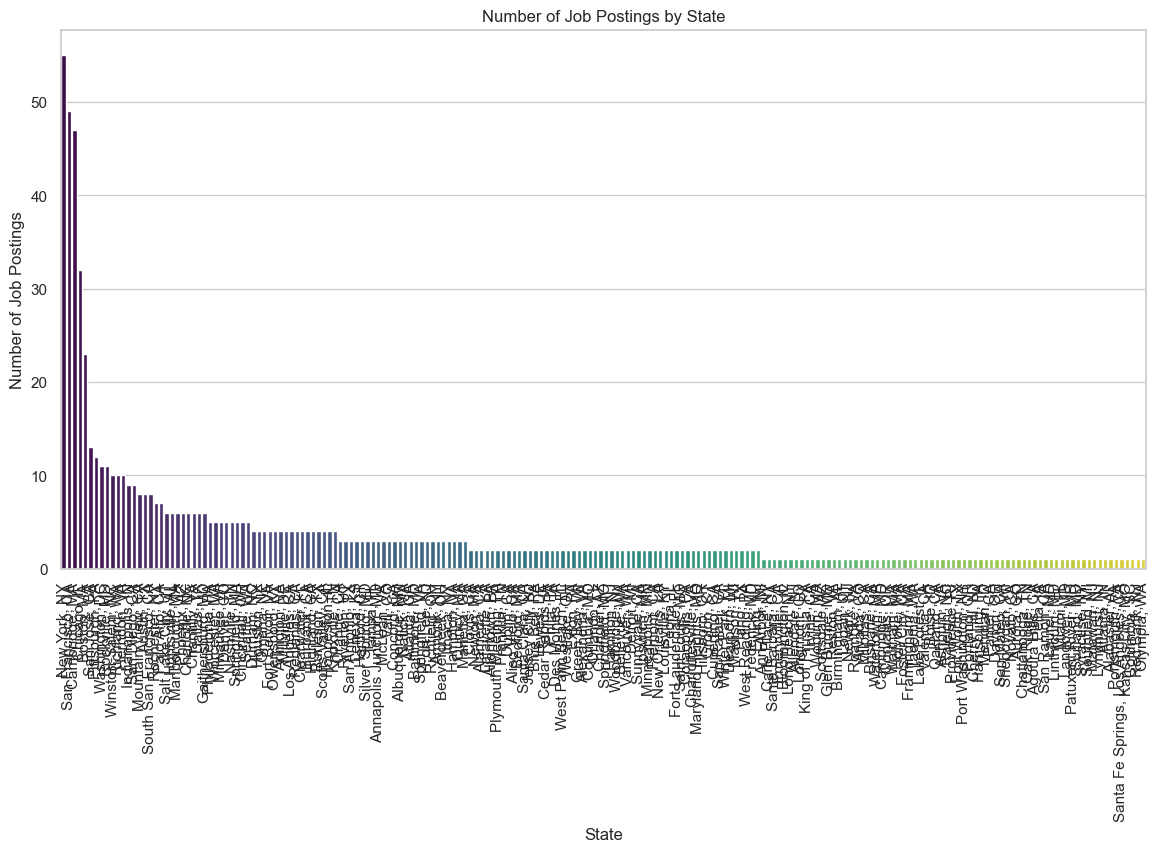

In [79]:
### 2 States with Most Number of Jobs.

# Set the size of the plot
plt.figure(figsize=(14, 7))

# Create a bar plot
sns.barplot(x='State', y='Number_of_Jobs', data=job_counts_df, palette='viridis')

# Add titles and labels
plt.title('Number of Job Postings by State')
plt.xlabel('State')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=90)  # Rotate state names for better readability

# Show the plot
plt.show()


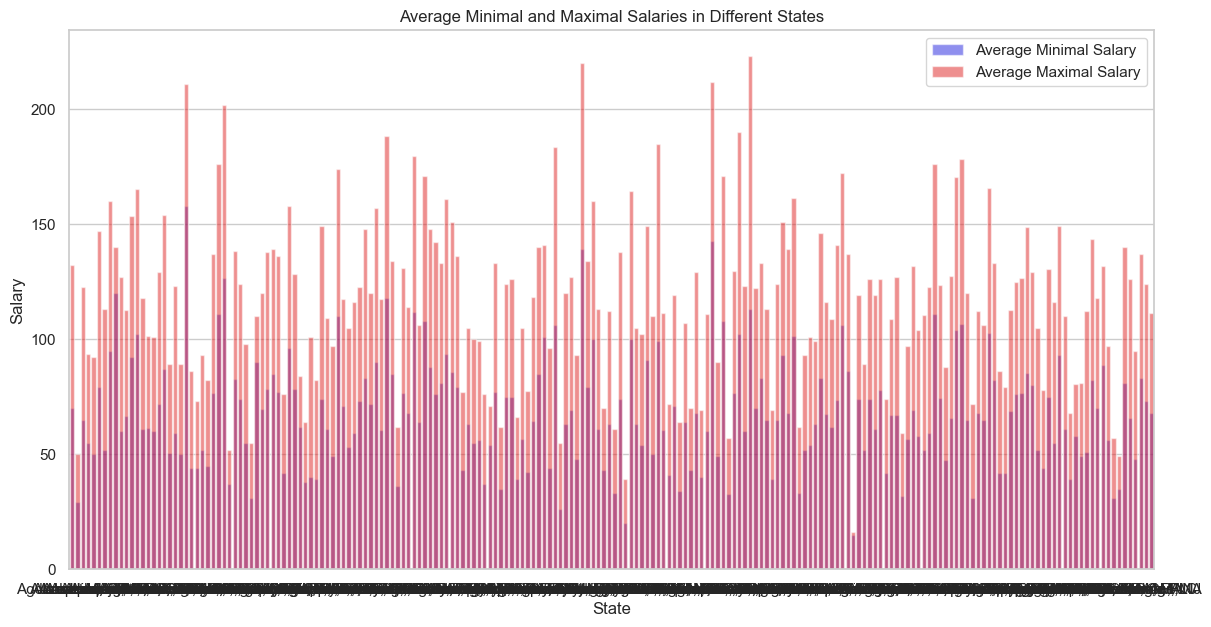

In [80]:
3  # Calculate average minimal and maximal salaries by state
salary_by_state = df.groupby('Location')[['Lower_Salary', 'Upper_Salary']].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='Location', y='Lower_Salary', data=salary_by_state, color='blue', alpha=0.5, label='Average Minimal Salary')
sns.barplot(x='Location', y='Upper_Salary', data=salary_by_state, color='red', alpha=0.5, label='Average Maximal Salary')
plt.title('Average Minimal and Maximal Salaries in Different States')

plt.xlabel('State')
plt.ylabel('Salary')
plt.legend()
plt.show()


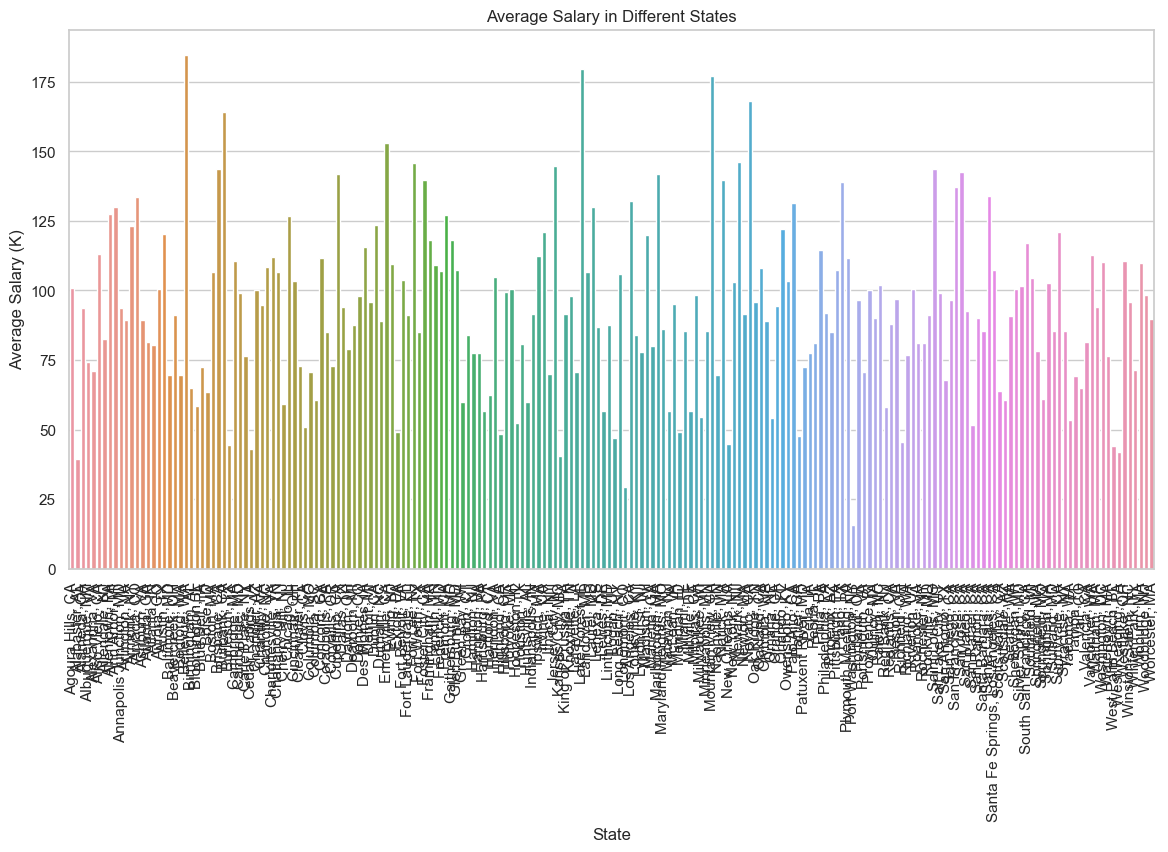

In [81]:
# 4 Calculate average salary in different state
avg_salary_by_state = df.groupby('Location')['Avg_SalaryK'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 7))
sns.barplot(x='Location', y='Avg_SalaryK', data=avg_salary_by_state)
plt.title('Average Salary in Different States')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Salary (K)')
plt.show()


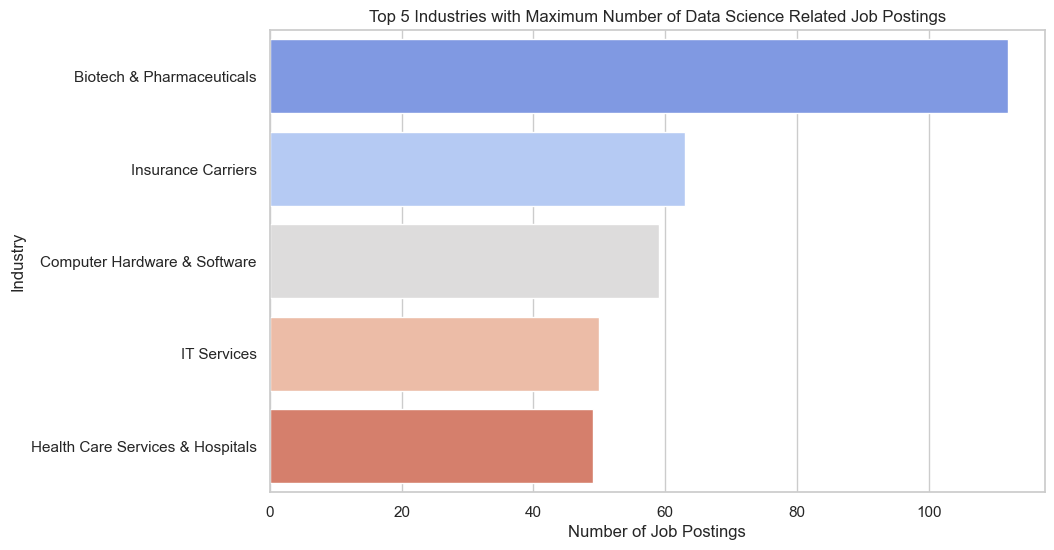

In [82]:
# 5 Count job postings by industry
industry_counts = df['Industry'].value_counts().nlargest(5)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='coolwarm')
plt.title('Top 5 Industries with Maximum Number of Data Science Related Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Industry')
plt.show()


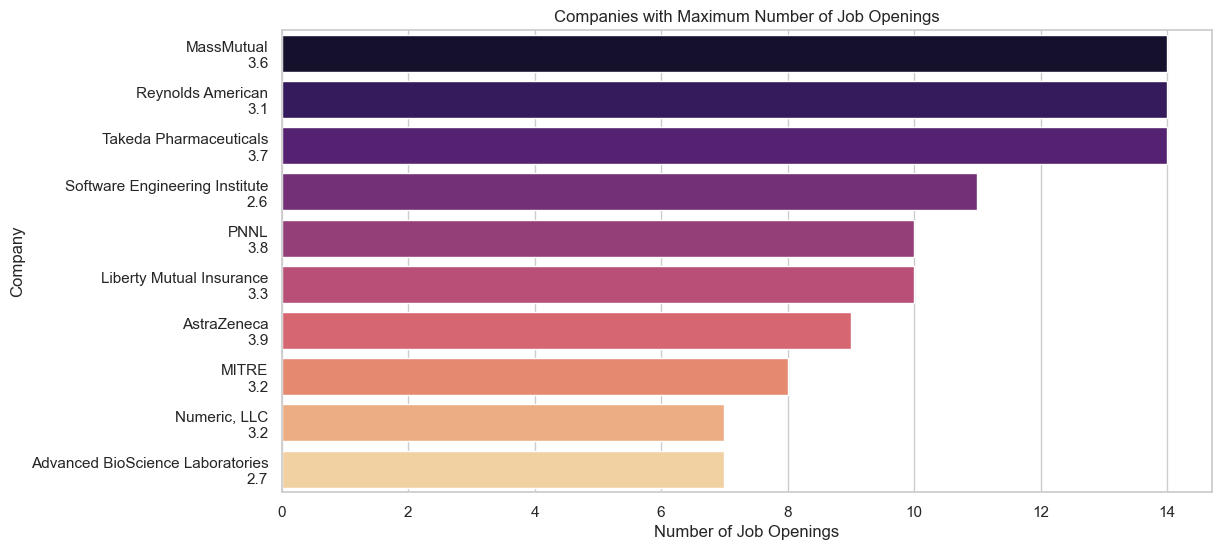

In [83]:
# 6 Count job openings by company
company_counts = df['Company_Name'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=company_counts.values, y=company_counts.index, palette='magma')
plt.title('Companies with Maximum Number of Job Openings')
plt.xlabel('Number of Job Openings')
plt.ylabel('Company')
plt.show()


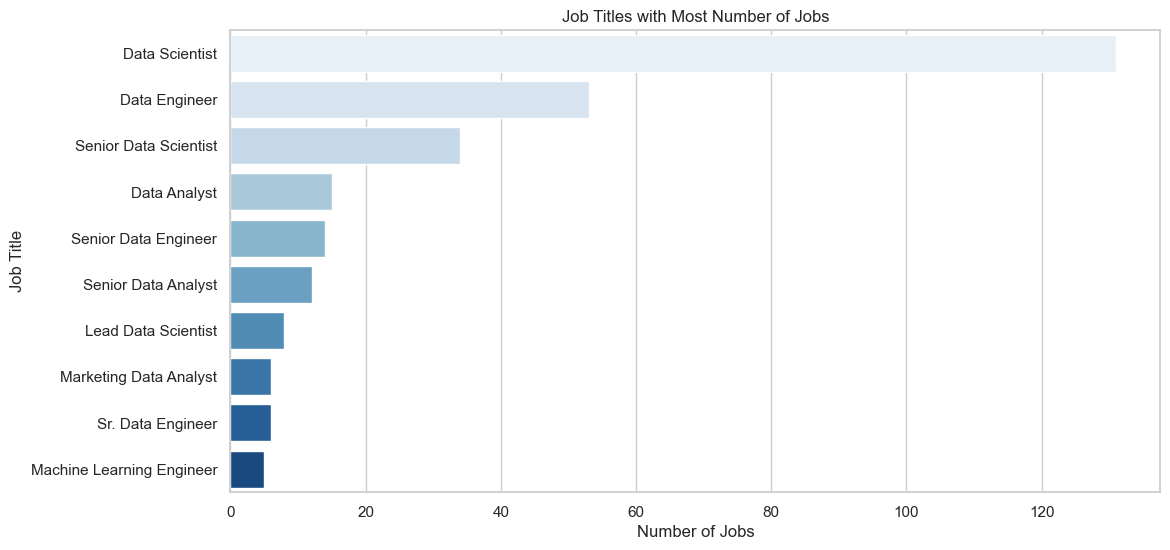

In [84]:
# 7 Count jobs by job title
job_title_counts = df['Job_Title'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette='Blues')
plt.title('Job Titles with Most Number of Jobs')
plt.xlabel('Number of Jobs')
plt.ylabel('Job Title')
plt.show()


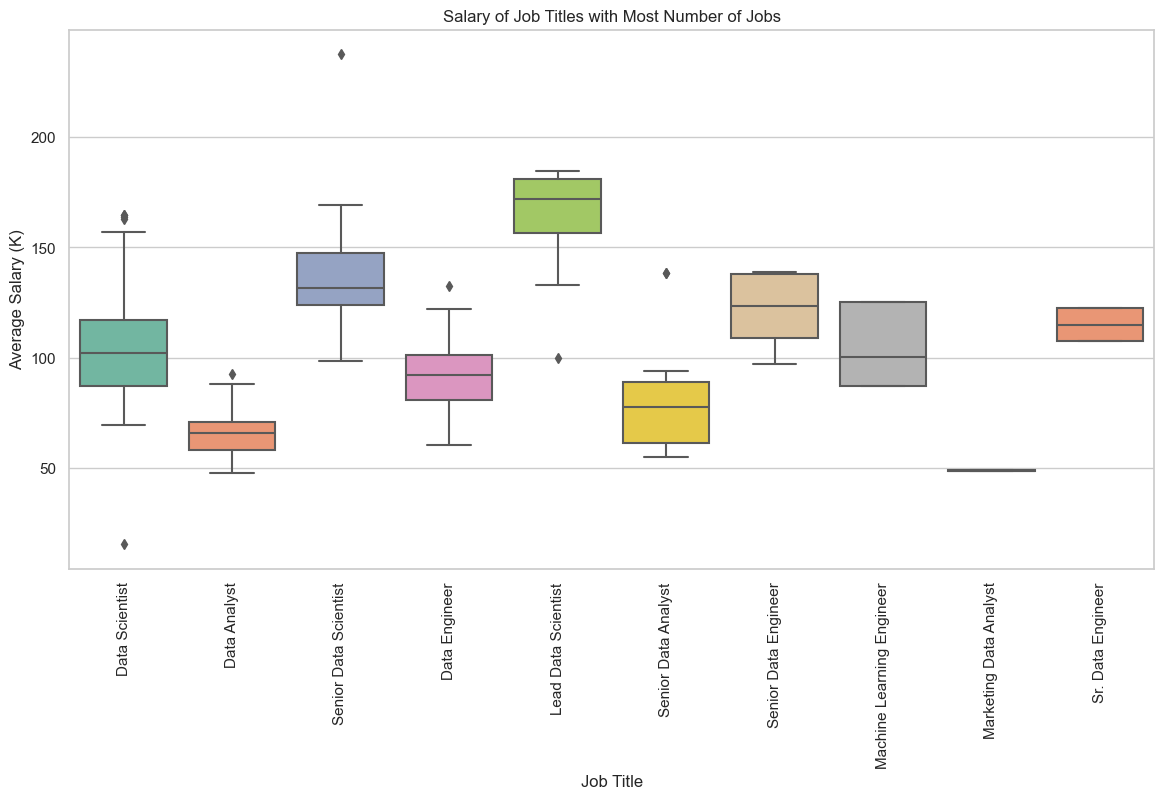

In [85]:
# 8  Convert the 'Avg_SalaryK' column to float if it contains decimal.Decimal values
salary_by_title['Avg_SalaryK'] = salary_by_title['Avg_SalaryK'].astype(float)

# Check for missing or non-numeric values
salary_by_title = salary_by_title.dropna(subset=['Avg_SalaryK'])

# Plotting
plt.figure(figsize=(14, 7))
sns.boxplot(x='Job_Title', y='Avg_SalaryK', data=salary_by_title, palette='Set2')
plt.title('Salary of Job Titles with Most Number of Jobs')
plt.xticks(rotation=90)
plt.xlabel('Job Title')
plt.ylabel('Average Salary (K)')
plt.show()


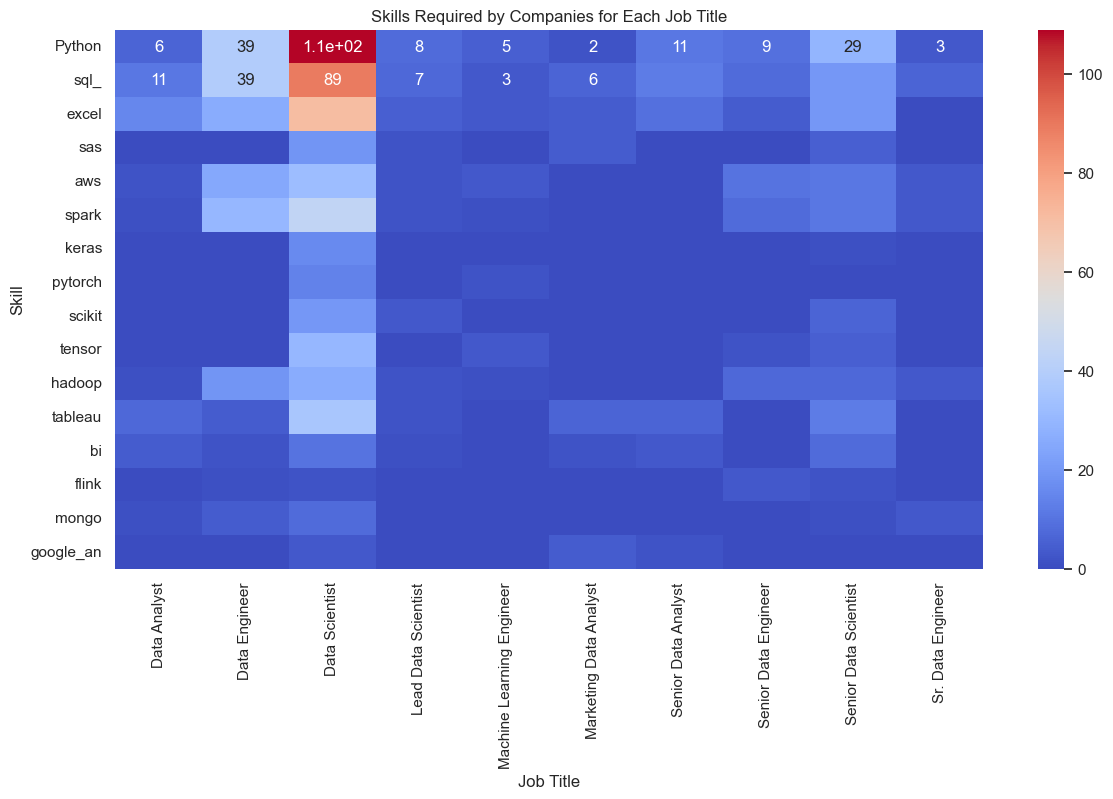

In [86]:
# 9 Skills Required by Companies for Each Job Title
# Aggregating skills by job title
skills = ['Python', 'sql_', 'excel', 'sas', 'aws', 'spark', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']
skills_by_title = df.groupby('Job_Title')[skills].sum().reset_index()

# Displaying skills for top job titles
top_skills = skills_by_title[skills_by_title['Job_Title'].isin(top_job_titles)].set_index('Job_Title')

# Plotting heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(top_skills.T, annot=True, cmap='coolwarm')
plt.title('Skills Required by Companies for Each Job Title')
plt.xlabel('Job Title')
plt.ylabel('Skill')
plt.show()


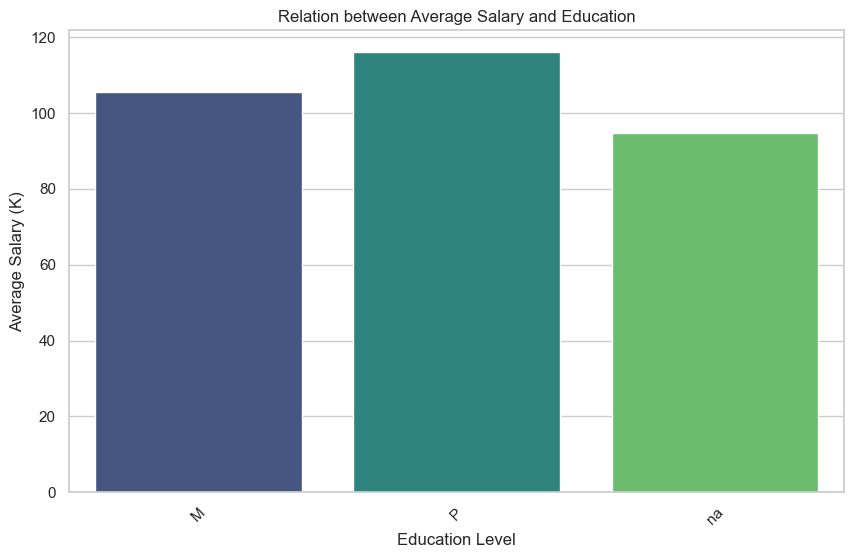

In [87]:
# 10 Grouping average salary by education
salary_by_education = df.groupby('Degree')['Avg_SalaryK'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Degree', y='Avg_SalaryK', data=salary_by_education, palette='viridis')
plt.title('Relation between Average Salary and Education')
plt.xticks(rotation=45)
plt.xlabel('Education Level')
plt.ylabel('Average Salary (K)')
plt.show()
